In [2]:
# Importing Required Libraries

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
%matplotlib inline

In [3]:
# Reading dataset using pandas

df=pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv',parse_dates=['Date'])
countries=['India','Italy','Canada', 'Germany', 'United Kingdom', 'US', 'France', 'China']
df=df[df['Country'].isin(countries)]

In [4]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths
32,2020-01-22,Canada,0,0,0
36,2020-01-22,China,548,28,17
62,2020-01-22,France,0,0,0
66,2020-01-22,Germany,0,0,0
79,2020-01-22,India,0,0,0


In [5]:
# Creating new Column as Cases 

df['Cases']=df[['Confirmed','Recovered','Deaths']].sum(axis=1)

In [6]:
df.head()

,Date,Country,Confirmed,Recovered,Deaths,Cases
32,2020-01-22,Canada,0,0,0,0
36,2020-01-22,China,548,28,17,593
62,2020-01-22,France,0,0,0,0
66,2020-01-22,Germany,0,0,0,0
79,2020-01-22,India,0,0,0,0


In [7]:
# Restructuring the table a bit

df = df.pivot(index='Date', columns='Country', values='Cases')

In [8]:
df.head()

Country,Canada,China,France,Germany,India,Italy,US,United Kingdom
Date,,,,,,,,
2020-01-22,0,593,0,0,0,0,1,0
2020-01-23,0,691,0,0,0,0,1,0
2020-01-24,0,982,2,0,0,0,2,0
2020-01-25,0,1487,3,0,0,0,2,0
2020-01-26,1,2180,3,0,0,0,5,0


In [9]:
# Setting the Index as Date
countries=list(df.columns)
covid=df.reset_index('Date')

In [10]:
covid.set_index('Date',inplace=True)

In [11]:
covid.columns=countries

In [12]:
covid.head()

,Canada,China,France,Germany,India,Italy,US,United Kingdom
Date,,,,,,,,
2020-01-22,0,593,0,0,0,0,1,0
2020-01-23,0,691,0,0,0,0,1,0
2020-01-24,0,982,2,0,0,0,2,0
2020-01-25,0,1487,3,0,0,0,2,0
2020-01-26,1,2180,3,0,0,0,5,0


In [13]:
# Storing Populations and Calculating Percapita Value

populations = {'India':1393109420,'Italy':60476318,'Canada':37664517, 'Germany': 83721496 , 'United Kingdom': 67802690 , 'US': 330548815, 'France': 65239883, 'China':1438027228}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000

In [14]:
percapita.head()

,Canada,China,France,Germany,India,Italy,US,United Kingdom
Date,,,,,,,,
2020-01-22,0.000000,0.041237,0.000000,0.0,0.0,0.0,0.000303,0.0
2020-01-23,0.000000,0.048052,0.000000,0.0,0.0,0.0,0.000303,0.0
2020-01-24,0.000000,0.068288,0.003066,0.0,0.0,0.0,0.000605,0.0
2020-01-25,0.000000,0.103406,0.004598,0.0,0.0,0.0,0.000605,0.0
2020-01-26,0.002655,0.151597,0.004598,0.0,0.0,0.0,0.001513,0.0


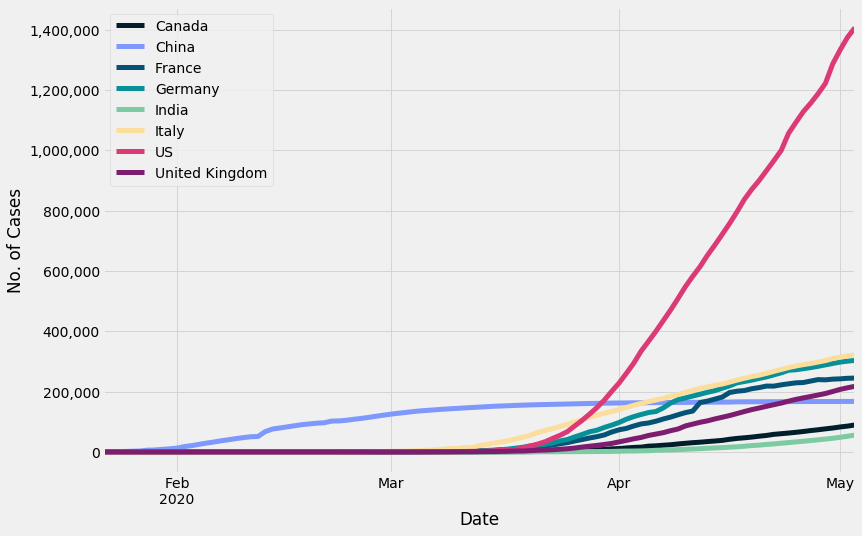

In [15]:
# Final Plot

# Color scheme for various countries and the plot style
colors = {'India':'#011e2b','Italy':'#7e98fb','Canada':'#045275', 'China':'#089099', 'France':'#7CCBA2', 'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')

# Plot Details 
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=True)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('No. of Cases')

# Printing the Plot
plt.show()